In [21]:
# This is a Python 3 environment

# Base level imports for data science work
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path
from json import decoder
import glob, os, json
import re

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [22]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
#cd /content/drive/MyDrive/BA/0.4/Sources/

# Start der Datenverarbeitung

In [24]:
fangcovid = pd.read_csv("https://chruezfalsch.ch/df_FANG-COVID.csv")

df_fangcovid = pd.DataFrame()
fangcovid.label = fangcovid.label.map({ 'fake' : 1, 'real' : 0})
df_fangcovid['fake'] = fangcovid['label']
del fangcovid['label']
df_fangcovid['text'] =  fangcovid['header'] + fangcovid['article']
del fangcovid['article']
del fangcovid['header']
del fangcovid['twitter-history']
df_fangcovid['url'] = fangcovid['url']
df_fangcovid['source'] = fangcovid['source']
del fangcovid
df=df_fangcovid
del df_fangcovid

In [25]:
df.sample(10)

,fake,text,url,source
20078,0,Maximal 15.000 Zuschauer im größten deutschen ...,https://www.tagesspiegel.de/wirtschaft/borussi...,tagesspiegel.de
34990,1,Wie im Vorjahr: Corona-Lockdowns enden rechtze...,https://www.journalistenwatch.com/2021/02/17/w...,journalistenwatch.com
1045,0,Schon jetzt die seltsamsten US Open aller Zeit...,https://www.zeit.de/sport/2020-08/tennis-us-op...,zeit.de
3703,1,Söder fordert: Totaler Lockdown statt „Halbsch...,https://www.compact-online.de/soeder-fordert-t...,compact-online.de
17801,0,Wieso Deutschland von einem Lockdown in den nä...,https://www.tagesspiegel.de/politik/vierte-wel...,tagesspiegel.de
4665,0,"Jung, fit und plötzlich am BeatmungsgerätDerze...",https://www.zeit.de/wissen/gesundheit/2020-04/...,zeit.de
32801,1,"Fehlende Einnahmen, höhere Ausgaben, Loch in S...",https://www.freiewelt.net/nachricht/merkels-lo...,freiewelt.net
31595,1,\n Lauterbach ein Verschwörungs...,https://de.rt.com/inland/115076-lauterbach-ver...,de.rt.com
28042,1,Die EU-Schuldenunion: Merkels Sargnagel für De...,https://www.anonymousnews.ru/2020/07/25/eu-sch...,anonymousnews.ru
20414,0,Trump nennt Corona-Infektion „Segen Gottes“ – ...,https://www.tagesspiegel.de/politik/videobotsc...,tagesspiegel.de


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


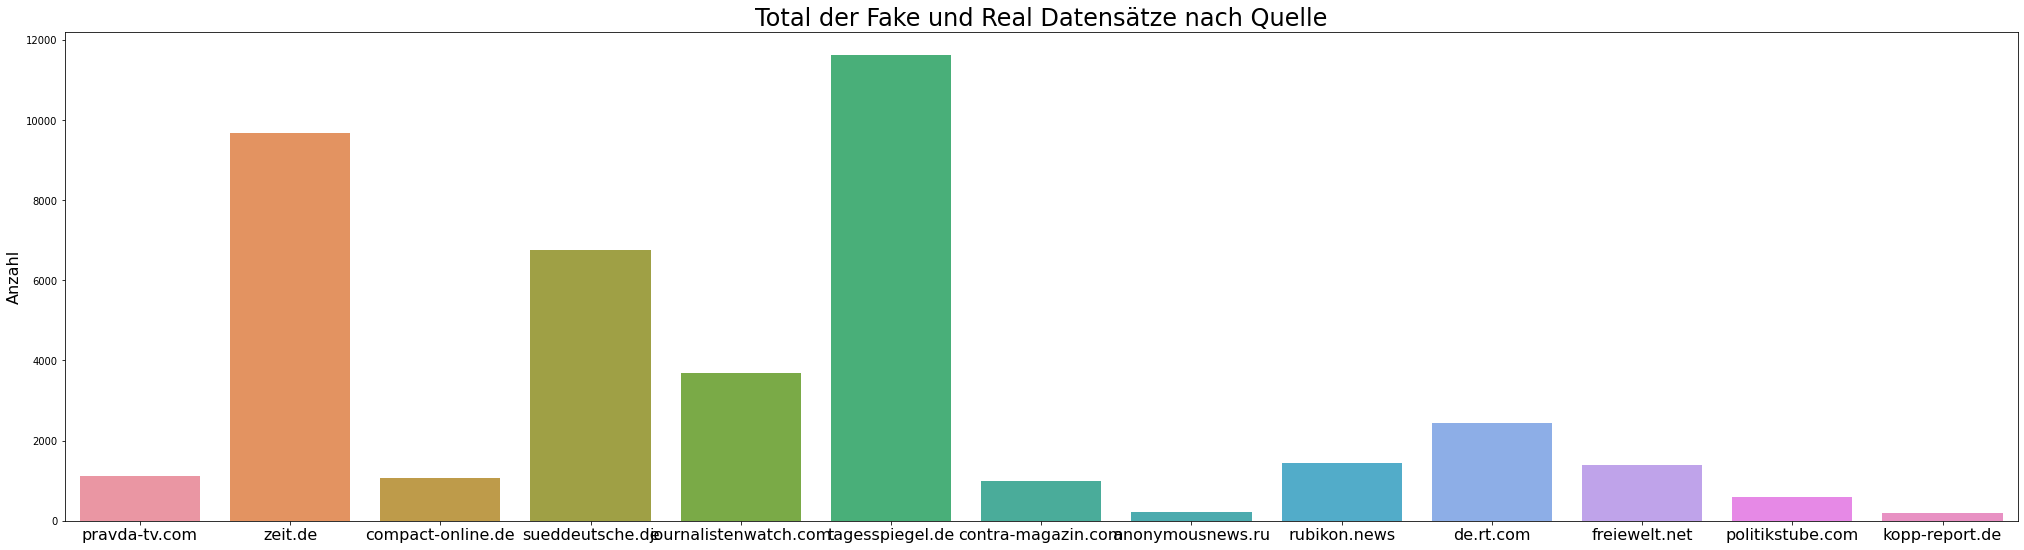

In [26]:
#UNBERENIGTE DATEN
#Ploten der Verteilung der Datensätze nach Quellen
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total der Fake und Real Datensätze nach Quelle', fontsize=24)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

In [27]:
#Berechnung der länge der einzelnen Datensätze
df['text'] = df['text'].astype(str)
df['len'] = df['text'].str.split().map(lambda x: len(x))

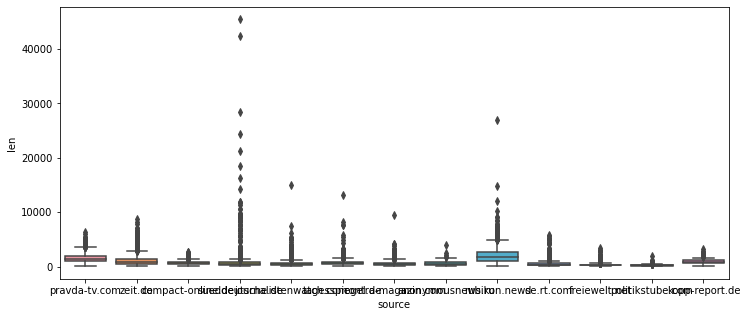

In [28]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='source', y='len', data=df)
plt.show()

In [29]:
df = df[df['text'].str.split().str.len().gt(400)]
df = df[df['text'].str.split().str.len().lt(4500)]

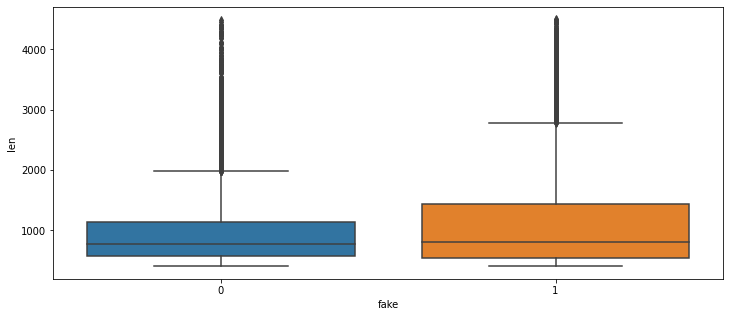

In [30]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='fake', y='len', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


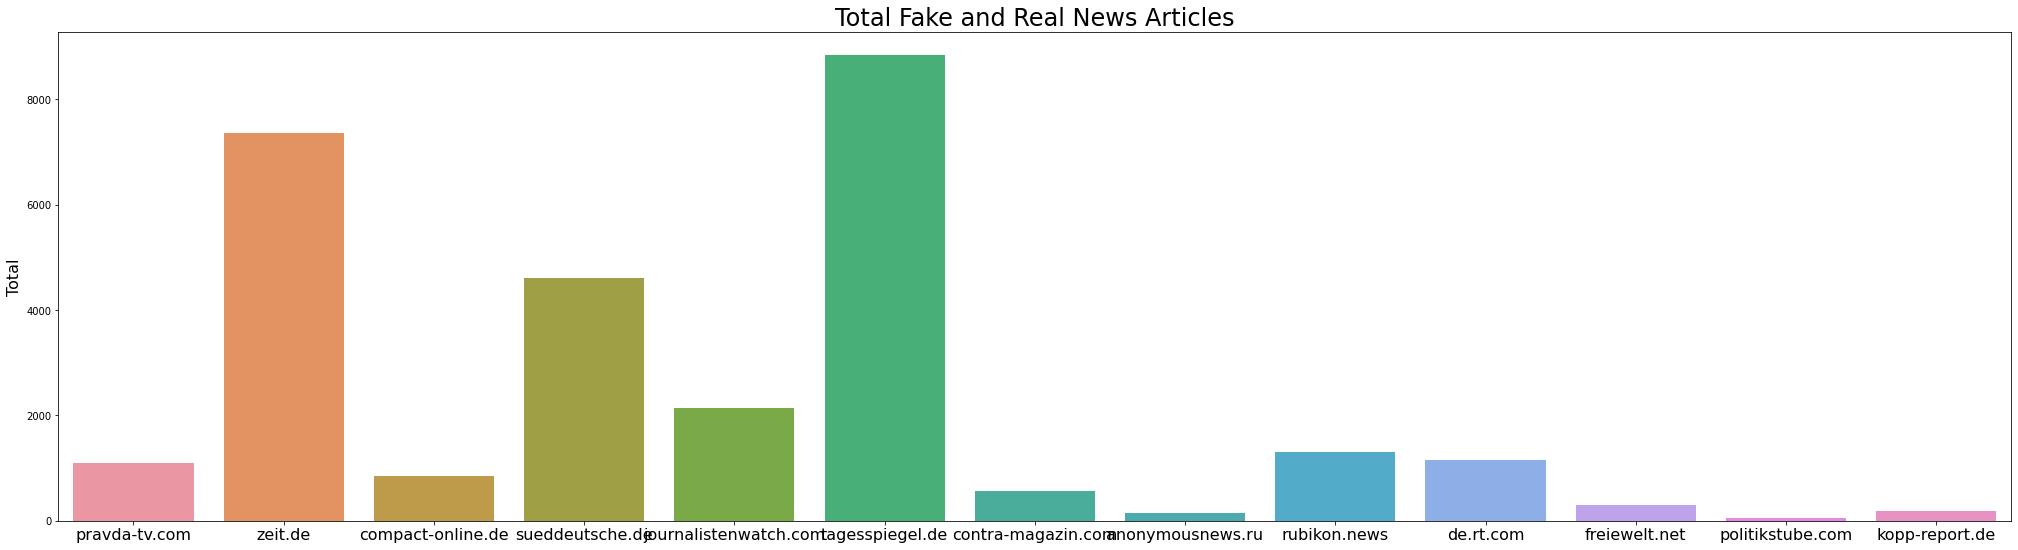

In [31]:
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


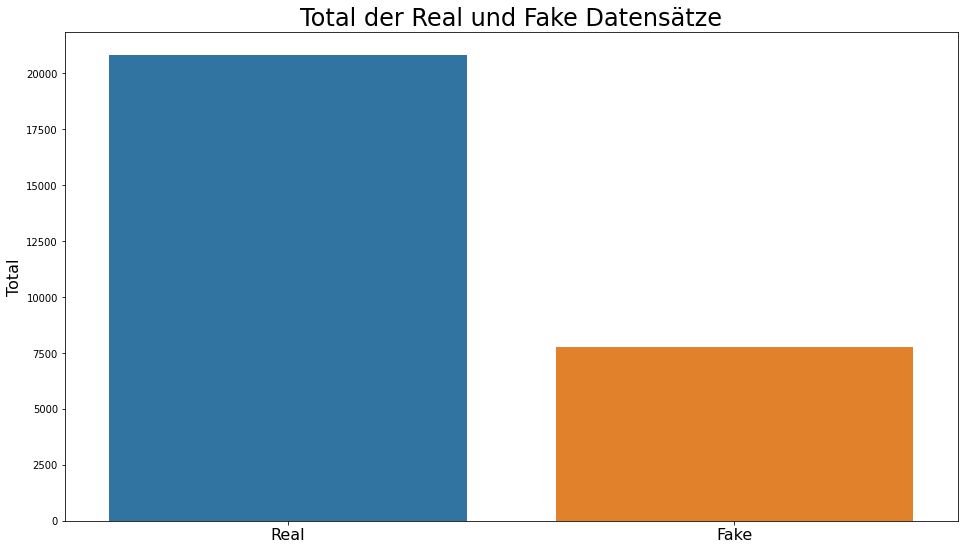

In [32]:
#Aufteilung Fake und Real News
plt.figure(figsize=(16,9))

sns.countplot(df.fake)
plt.title('Total der Real und Fake Datensätze', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0,1], ['Real','Fake'], fontsize=16)
plt.xticks(fontsize=16)

plt.show()

In [33]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
stop = set(stopwords.words('german'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def removeurls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
def removeklatv(text):
  return re.sub("(?i)kla.tv:","Quelle", text)
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
def wordstem(text):
    stemmer = SnowballStemmer("german")
    final_text = []
    for i in text.split():
      word=""
      for z in i:
        if z.isalpha():
          word=word+z
        else:
          if word !="":
            stemed=stemmer.stem(word)
            if stemed == "":
                stemed=word
            final_text.append(stemed)
            #print(word, "/", stemed)
          word=""
          final_text.append(z)
          #final_text.append(stemmer.stem(i.strip()))
        final_text.append(" ")
    return "".join(final_text)
# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    #text = wordstem(text)
    return text

In [35]:
#Quellen Entfernen
df['text']=df['text'].replace("kla.tv", "Quelle")
df['text']=df['text'].replace("KLA.TV", "Quelle")
df['text']=df['text'].replace("KLA.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV", "Quelle")
df['text']=df['text'].replace("blick.ch", "Quelle")
df['text']=df['text'].replace("watson.ch", "Quelle")
df['text']=df['text'].replace("watson", "Quelle")
df['text']=df['text'].replace("Zeit Online", "Quelle")
df['text']=df['text'].replace("Zeit online", "Quelle")
df['text']=df['text'].replace("zeit online", "Quelle")
df['text']=df['text'].replace("(...)", "")
df['text']=df['text'].replace("...", ".")
df['text']=df['text'].replace("!!!", "!")
df['text']=df['text'].replace("???", "?")
df['text']=df['text'].replace("ß", "ss")

In [36]:
df['text']=df['text'].apply(removeurls)
df['text']=df['text'].apply(removeklatv)
df['text']=df['text'].apply(remove_emojis)
df['text']=df['text'].apply(clean_text)

In [37]:
df.sample(10)

,fake,text,url,source,len
16316,0,"Credit Points Corona-HilfeStudierende, Corona-...",https://www.tagesspiegel.de/wissen/studierende...,tagesspiegel.de,588
24623,0,Erzählen Corona-GeschichteHinter Corona-Pandem...,https://www.tagesspiegel.de/gesellschaft/mache...,tagesspiegel.de,501
29544,1,Toten spielt nicht!Was bedeutet „Ruhe Frieden!...,https://www.rubikon.news//artikel/mit-toten-sp...,rubikon.news,511
40861,0,"Angebot, ablehnen könnenIn Not müssen Behörden...",https://www.zeit.de/2020/18/atemschutzmasken-m...,zeit.de,1780
27549,1,Bedrohung „Monsterkeime“unter Lupe nehmenMit A...,https://www.contra-magazin.com/2020/05/die-bed...,contra-magazin.com,736
11673,0,München dämmertWas zeichnen Münchner Karikatur...,https://www.sueddeutsche.de/muenchen/cartoons-...,sueddeutsche.de,1078
38817,0,Plötzlich BerlinMonatelang Infektionszahlen Ha...,https://www.zeit.de/politik/2020-10/corona-zah...,zeit.de,1841
27999,1,Corona-Impfstofftests schockierenden Nebenwirk...,https://www.anonymousnews.ru/2020/10/11/nebenw...,anonymousnews.ru,603
22344,0,Seele dringend gesuchtBesuch Dauerbaustelle: M...,https://www.tagesspiegel.de/kultur/kulturforum...,tagesspiegel.de,1204
19819,0,Tagen entscheidet Schicksal LufthansaDie Krani...,https://www.tagesspiegel.de/wirtschaft/milliar...,tagesspiegel.de,929


In [38]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd /content/drive/MyDrive/BA/Project/

/content/drive/MyDrive/BA/Project


In [40]:
df.to_csv('df_FANG-COVID_cleaned.csv')
!cp df_FANG-COVID_cleaned.csv "/content/drive/MyDrive/BA/Project/df_FANG-COVID_cleaned.csv"

cp: 'df_FANG-COVID_cleaned.csv' and '/content/drive/MyDrive/BA/Project/df_FANG-COVID_cleaned.csv' are the same file
